### Task 1.1 - Logistic regression

\begin{equation*}
    E = \frac{1}{N} \sum_{n=1}^{N} (-t^n ln(y^n) - (1-t^n)ln(1-y^n))
\end{equation*}

where

\begin{equation*}
    y^n = g_w^n = g_w(x^n) = \frac{1}{1 + e^{-w^Tx^n}}
\end{equation*}

Introducing $E^n = -t^n ln(y^n) - (1-t^n)ln(1-y^n)$, $E$ can be written as

\begin{equation*}
    E = \frac{1}{N} \sum_{n=1}^{N} E^n
\end{equation*}

Differentiating $E^n$ with respect to the weight $w_j$ then yields

\begin{align*}
    \frac{\partial E^n}{\partial w_j}
    & = 
    \frac{\partial E^n}{\partial y^n} \frac{\partial y^n}{\partial w_j}
    \\
    & = 
    \frac{\partial E^n}{\partial g_w^n} \frac{\partial g_w^n}{\partial w_j}
\end{align*}

The different partial derivatives are then calculated as:

\begin{align*}
    \frac{\partial E^n}{\partial g_w^n}
    & =
    \frac{\partial}{\partial g_w^n} \bigg( -t^n ln(g_w^n) - (1-t^n)ln(1-g_w^n) \bigg)
    \\
    & = 
    - \frac{t^n}{g_w^n}
    - \frac{1-t^n}{1-g_w^n} \cdot (-1)
    \\
    & =
    - \frac{t^n}{g_w^n}
    + \frac{1-t^n}{1-g_w^n}
    \\
    & =
    \frac{g_w^n(1-t^n)-t^n(1-g_w^n)}{g_w^n(1-g_w^n)}
    \\
    & =
    \frac{g_w^n - g_w^nt^n - t^n + g_w^nt^n}{g_w^n(1-g_w^n)}
    \\
    & =
    \frac{g_w^n - t^n}{g_w^n(1-g_w^n)}
    \\
    \\
    \frac{\partial g_w^n}{\partial w_j}
    & =
    \frac{\partial}{\partial w_j} \bigg( \frac{1}{1+e^{-w^Tx^n}} \bigg)
    \\
    & =
    \frac{e^{-w^Tx^n} x_j^n}{\big( 1 + e^{-w^Tx^n} \big)^2}
    \\
    & =
    \frac{e^{-w^Tx^n} x_j^n + x_j^n - x_j^n}{\big( 1 + e^{-w^Tx^n} \big)^2}
    \\
    & =
    x_j^n \cdot \frac{1}{1 + e^{-w^Tx^n}} \cdot \bigg( \frac{1 + e^{-w^Tx^n}}{1 + e^{-w^Tx^n}} - \frac{1}{1 + e^{-w^Tx^n}} \bigg)
    \\
    & =
    x_j^n g_w^n (1 - g_w^n)
\end{align*}

The cost gradient then becomes:

\begin{align*}
    \frac{\partial E^n}{\partial w_j}
    & =
    \frac{\partial E^n}{\partial g_w^n} \frac{\partial g_w^n}{\partial w_j}
    \\
    & = 
    \frac{g_w^n - t^n}{g_w^n(1-g_w^n)} x_j^n g_w^n (1 - g_w^n)
    \\
    & = 
    (g_w^n - t^n) x_j^n
\end{align*}

### Task 1.2 - Softmax regression

\begin{align*}
    \frac{\partial E^n}{\partial w_{ij}^n}
    & =
    \frac{\partial E^n}{\partial a_i^n} \frac{\partial a_i^n}{\partial w_{ij}}
\end{align*}

The partial derivatives are:

\begin{align*}
    \frac{\partial E^n}{\partial a_i^n}
    & =
    - \sum_{k} \Big( t_k^n \frac{\partial \ln (y_k^n)}{\partial a_i^n} \Big)
    \\
    & =
    - \sum_{k} \Big( \frac{t_k^n}{y_k^n} \frac{\partial y_k^n}{\partial a_i^n} \Big)
    \\
    \\
    \frac{\partial y_k^n}{\partial a_i^n}
    & =
    \frac{\partial}{\partial a_i^n} \Big( \frac{e^{a_k^n}}{\sum_{i} e^{a_i^n}} \Big)
    \\
    & =
    \left\{
	\begin{array}{ll}
        \frac{e^{a_i^n}\sum_{i} e^{a_i^n} - e^{a_i^n}e^{a_i^n}}{(\sum_{i} e^{a_i^n})^2} & \mbox{if } k = i \\
		\frac{-e^{a_k^n}e^{a_i^n}}{(\sum_{i} e^{a_i^n})^2} & \mbox{if } k \neq i
	\end{array}
    \right.
    \\
    & =
    \left\{
	\begin{array}{ll}
        y_i^n (1 - y_i^n) & \mbox{if } k = i \\
		-y_k^n y_i^n & \mbox{if } k \neq i
	\end{array}
    \right.
    \\
    \\
    \frac{\partial a_i^n}{\partial w_{kj}}
    & =
    \frac{\partial}{\partial w_{kj}} \bigg( w_k^T x \bigg)
    \\
    & =
    x_j
\end{align*}

Thus the loss gradient becomes:

\begin{align*}
    \frac{\partial E^n}{\partial w_{ij}^n}
    & =
    \frac{\partial E^n}{\partial a_i^n} \frac{\partial a_i^n}{\partial w_{ij}}
    \\
    & =
    \Big( - \sum_{k} \Big( \frac{t_k^n}{y_k^n} \frac{\partial y_k^n}{\partial a_i^n} \Big) \Big) x_j
    \\
    & =
    \Big( - \frac{t_i^n}{y_i^n} y_i^n (1-y_i^n) - \sum_{k \neq i} \Big( \frac{t_k^n}{y_k^n} \cdot -y_k^ny_i^n \Big) \Big) x_j
    \\
    & =
    \Big( - t_i^n(1-y_i^n) + \sum_{k \neq i} \Big( t_k^n y_i^n \Big) \Big) x_j
    \\
    & =
    \Big( - t_i^n(1-y_i^n) + \sum_{k \neq i} \Big( t_k^n y_i^n \Big) \Big) x_j
    \\
    & =
    \Big( - t_i^n +t_i^ny_i^n + \sum_{k \neq i} \Big( t_k^n y_i^n \Big) \Big) x_j
    \\
    & =
    \Big( - t_i^n + y_i^n \sum_{k} \Big( t_k^n \Big) \Big) x_j
    \\
    & =
    \Big( y_i^n - t_i^n \Big) x_j
\end{align*}

### Task 2.1 - Logistic regression through gradient descent

#### a)

After experimenting with different learning rates, eta = 0.001 was found to be a reasonably good value with an annealing period T = 30. The following results were obtained by training the perceptron on the entire training set, i.e train_size = 60000, with 10% of it being used for validation, i.e. val_perc = 0.1. The perceptron was then tested on the entire testing set, i.e. test_size = 10000.

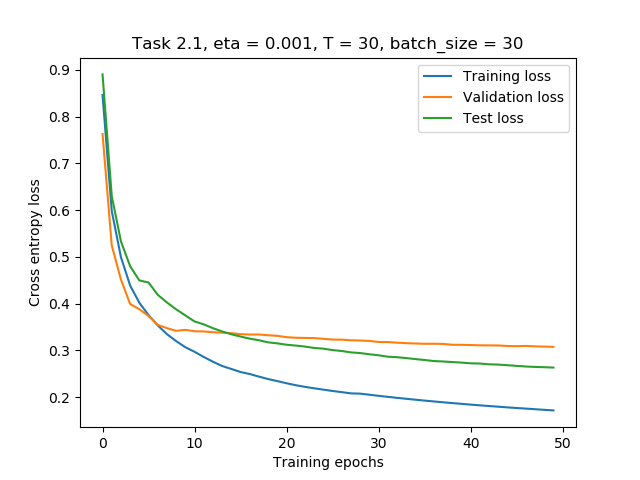

From the graph one can see that the test loss decreases more slowly then the validation loss in the beginning. This is most likely due to the test set containing more noisy data, and thus are harder for the perceptron to classify. The discrepancy between the test loss and the validation loss means that the validation set is not a good representation of the test set in this situation.

#### b)

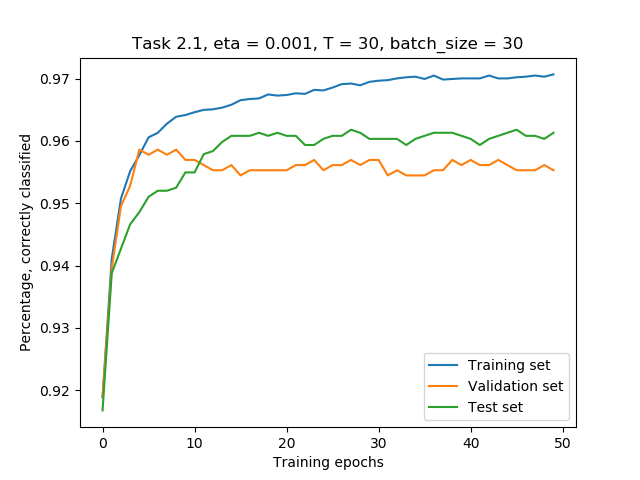

The figure above shows the percentages of correctly classified digits from the training set, validation set and testing set. The same parameters as in task 2.1a were used.

### Task 2.2 - Regularization

#### a)

Introducing $L_{1}$ or $L_{2}$ regularization of the weights in the perceptron, the objective function is given by:

\begin{align*}
    J(w)
    &=
    E(w) + \lambda C_{2}(w)
\end{align*}

The gradient of the objective function is then given as:

\begin{align*}
    \frac{\partial J}{\partial w}
    &=
    \frac{\partial E}{\partial w} + \frac{\partial C_{2}}{\partial w}
\end{align*}

$L_{2}$ regularization is defined as

\begin{align*}
    C_{2}(w)
    &=
    ||w||^2
    \\
    &=
    \sum_{i,j}|w_{i,j}|^2
\end{align*}

hence its gradient is given by:

\begin{align*}
    \frac{\partial C}{\partial w}
    &=
    \frac{\partial}{\partial w}(||w||^2)
    \\
    &=
    2w
\end{align*}

Thus the update rule for the weights becomes:

\begin{align*}
    w_{kj, t+1} 
    &= w_{kj, t} - \eta \Big( \frac{\partial J}{\partial w_{kj}} \Big)
    \\
    &=
    w_{kj, t} - \eta \Big( \sum_{n=1}^{N}\frac{\partial E_w^n}{w_{kj}} + 2 \lambda w_{kj, t} \Big)
    \\
    &=
    w_{kj, t} - \eta \Big( \sum_{n=1}^{N}((g_w^n - t^n) x_j^n) + 2 \lambda w_{kj, t} \Big)
\end{align*}

#### b)

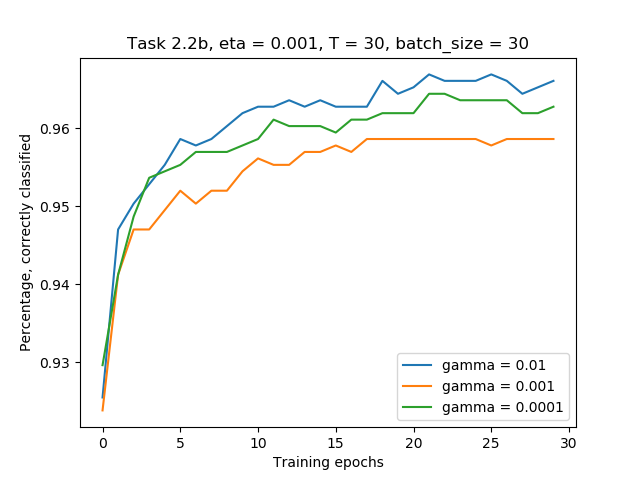

From the plot one can see that the network with the higher value of the L2 regularization parameter gets a higher accuracy in the early training phase. The best value seems to be gamma = 0.01.

#### c)

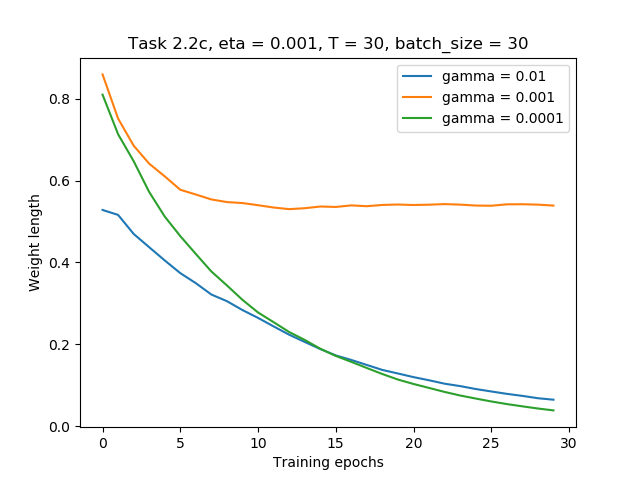

From the plot one can see that the weight lengths are sensitive to initial values. However one can see that L2 regularization factor affects the change in the network weights in that the network with the higher regularization factor seems to have less volatile weight changes. This may indicate that the L2 regularization makes the weight changes in the network more stable.

#### d)

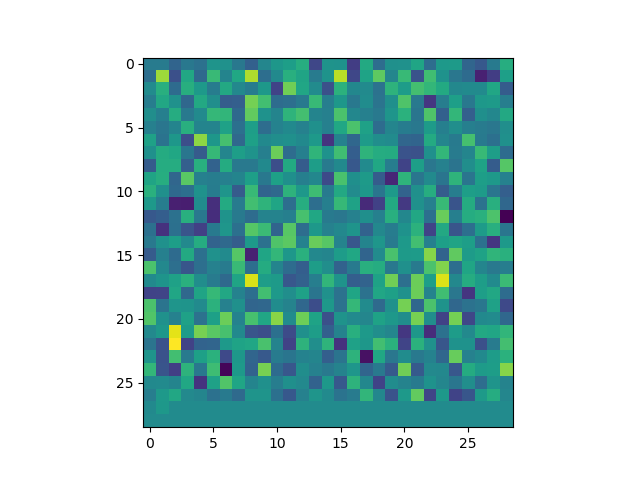

gamma = 0.01
One can see clear peaks in certain weight areas and clear lows in other.

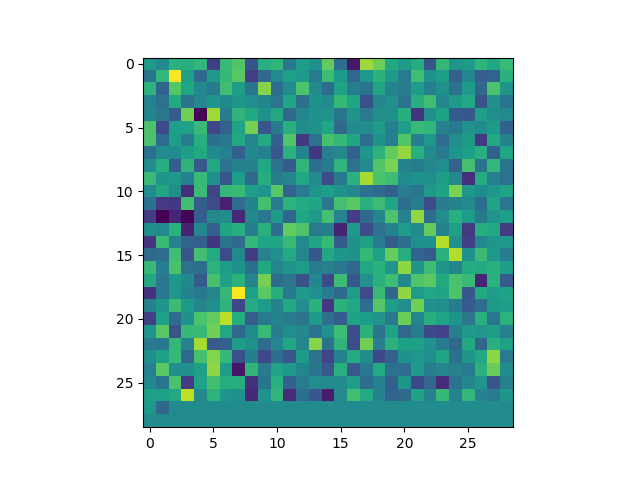

gamma = 0.001
The peaks and lows are less clear.

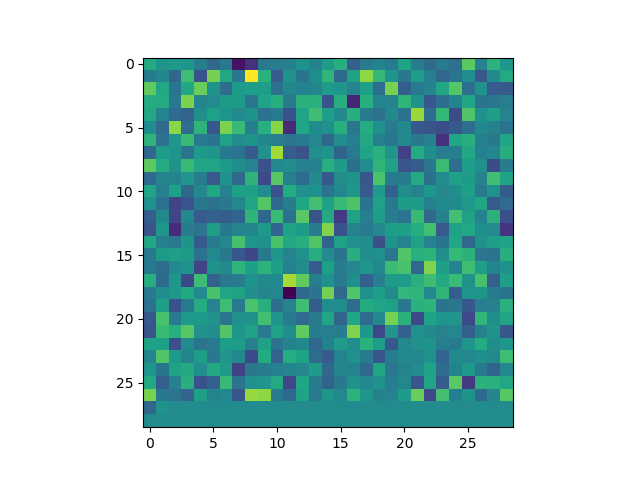

gamma = 0.0001
There are very few peaks and lows.

### Task 3 - Softmax regression through gradient descent